<a href="https://colab.research.google.com/github/Vladzimir-40/Proj_1/blob/main/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rtatman/chocolate-bar-ratings")

print("Path to dataset files:", path)

100%|██████████| 30.3k/30.3k [00:00<00:00, 25.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rtatman/chocolate-bar-ratings/versions/1


In [ ]:
path

'/root/.cache/kagglehub/datasets/rtatman/chocolate-bar-ratings/versions/1'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Dataset head:
     Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                      A. Morin                       Agua Grande  1876   
1                      A. Morin                             Kpime  1676   
2                      A. Morin                            Atsane  1676   
3                      A. Morin                             Akata  1680   
4                      A. Morin                            Quilla  1704   
...                         ...                               ...   ...   
1790                     Zotter                              Peru   647   
1791                     Zotter                             Congo   749   
1792                     Zotter                      Kerala State   749   
1793                     Zotter                      Kerala State   781   
1794                     Zotter

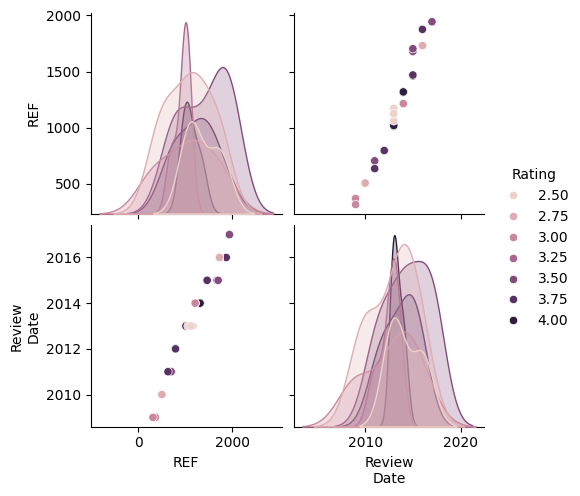

In [6]:
import pandas as pd
from google.colab import drive
import os
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

#https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings/data
class Data_Loader:

  @staticmethod
  def data_loading(file_link, category, numeric_features, categorical_features):
    try:
      drive.mount('/content/drive')
      file_path = f"/content/drive/{file_link}"

      # Загрузка CSV файла
      dataset = pd.read_csv(file_path)

      if not os.path.exists(file_path):
        raise FileNotFoundError(f"Файл {file_path} не найден")

      # Проверяем, что файл не пустой
      if os.path.getsize(file_path) == 0:
        raise ValueError(f"Файл {file_path} пустой")

      imputer = SimpleImputer(strategy='mean')

      # Выбираем только числовые колонки для импутации
      numeric_columns = numeric_features + [category]

      # Применяем импутер
      dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

      imputer = SimpleImputer(strategy='most_frequent')

      # Применяем к строковым колонкам
      string_columns = categorical_features
      dataset[string_columns] = imputer.fit_transform(dataset[string_columns])

      return dataset[numeric_features + categorical_features + [category]]

    except FileNotFoundError as e:
      print(f"Ошибка: {e}")
      print("Проверьте наличие файла в Google Drive")
      return None

    except ValueError as e:
      print(f"Ошибка данных: {e}")
      return None

    except Exception as e:
      print(f"Неожиданная ошибка: {e}")
      return None

class Data_Informer:

  @staticmethod
  def show_dataset(dataset):
    print(f"\nDataset head:\n{dataset}\n")

  @staticmethod
  def show_info(dataset):
    print(f"\nDataset info:\n{dataset.info()}\n")

  @staticmethod
  def show_describe(dataset):
    print(f"\nDataset describe:\n{dataset.describe()}\n")

  @staticmethod
  def show_types(dataset):
    print(f"\nDataset types:\n{dataset.dtypes}\n")

  @staticmethod
  def show_null_values(dataset):
    print(f"\nDataset null values:\n{dataset.isnull().sum()}\n")

  @staticmethod
  def show_nan_values(dataset):
    print(f"\nDataset NaN values:\n{dataset.isna().sum()}\n")

  @staticmethod
  def show_all_info(dataset):
    Data_Informer.show_dataset(dataset)
    Data_Informer.show_info(dataset)
    Data_Informer.show_describe(dataset)
    Data_Informer.show_types(dataset)
    Data_Informer.show_null_values(dataset)
    Data_Informer.show_nan_values(dataset)

class Data_Visualiser:
  @staticmethod
  def visualise_pairplot(dataset, category):
    sample_data = dataset.head(50)
    # Построение парных графиков при помощи sns
    sns.pairplot(sample_data, hue=category)
    plt.show()

file_link = 'MyDrive/Colab Notebooks/flavors_of_cacao.csv'
numeric_features = ['REF', 'Review Date']  # числовые признаки
categorical_features = ['Company', 'Specific Origin']  # категориальные признаки
category = 'Rating'  # целевая переменная

file_path = f"/content/drive/{file_link}"
dataset = pd.read_csv(file_path)
drive.mount('/content/drive')


#dataset = Data_Loader.data_loading(
#    file_link=file_link,
#    category=category,
#    numeric_features=numeric_features,
#    categorical_features=categorical_features
#)

Data_Informer.show_all_info(dataset)
Data_Visualiser.visualise_pairplot(dataset, category)